![NCIA](NCIA_Images\start.png)

# Building Neural Networks with PyTorch

### Setup

Este projeto requer Python 3.10 ou superior:

In [ ]:
!pip install -q pandas matplotlib seaborn scikit-learn

You should consider upgrading via the 'C:\Users\antonio.fontenele\Documents\NCIA\Material_Aulas\Aula 32\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![pt](Aula_Imagens/pytorch.png)

</div>


   
   Isso demora 9 minutos =/

In [ ]:
!pip install torch>=2.8.0

You should consider upgrading via the 'C:\Users\antonio.fontenele\Documents\NCIA\Material_Aulas\Aula 32\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import sys
assert sys.version_info >= (3, 10)

Também requer Scikit-Learn ≥ 1.6.1:

In [ ]:
from packaging.version import Version
import sklearn
assert Version(sklearn.__version__) >= Version("1.6.1")

E é claro que precisamos do PyTorch, especificamente do PyTorch ≥ 2.8.0:

In [ ]:
import torch

assert Version(torch.__version__) >= Version("2.8.0")

Como fizemos nos capítulos anteriores, vamos definir os tamanhos de fonte padrão para deixar as figuras mais bonitas:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Sobre o Pytorch

PyTorch é uma biblioteca open source de deep learning (originada do Torch/Lua) mantida pelo laboratório FAIR (Meta AI). Em Python, oferece **tensores**, **autodiferenciação (autograd)**, **aceleração por GPU/TPU** e um ecossistema de **camadas, perdas e otimizadores prontos**, tornando o desenvolvimento de redes neurais ágil e produtivo. Conceitualmente, lembra o NumPy, mas com suporte nativo a **cálculo em hardware acelerado** e **gradientes automáticos**.

"PôfêSô, por que Pt? eu gostava do TF!" Em 2016, o **TensorFlow** dominava o cenário por desempenho e escalabilidade, porém seu modelo de programação era mais **estático e complexo**. O PyTorch foi criado com uma proposta **mais “pythônica” e dinâmica**, usando **grafos computacionais dinâmicos (define-by-run)**, o que facilita a **depuração**, a **exploração interativa** e a **pesquisa**.
Além do design limpo e documentação robusta, a comunidade open source cresceu rapidamente; em 2022, a governança migrou para a **PyTorch Foundation** (Linux Foundation), consolidando o ecossistema. O resultado prático foi a **adoção massiva na academia** e, por consequência, **migração gradual da indústria**.

## O que você aprenderá neste capítulo

* **Fundamentos**: como trabalhar com **tensores** e **autograd** no PyTorch.
* **Primeiros passos de modelagem**: construir e treinar um **modelo de regressão linear** para entender o pipeline básico.
* **Evolução para redes profundas**: ampliar para **redes multicamadas (MLP)**:

  * **Regressão** com redes neurais.
  * **Classificação** com redes neurais.
* **Arquiteturas personalizadas**: criar modelos com **múltiplas entradas** ou **múltiplas saídas**.
* **Ajuste de hiperparâmetros**: usar **Optuna** para **tunar** modelos automaticamente.
* **Otimização e exportação**: técnicas para **otimizar desempenho** e **salvar/exportar** modelos para uso em produção.

> **Resumo da ideia central**: PyTorch equilibra **simplicidade**, **flexibilidade** e **alto desempenho** graças aos **grafos dinâmicos** e ao **ecossistema maduro**. Este capítulo guia você do **básico (tensores/autograd)** à **produção (tuning, otimização e exportação)** passando por exemplos práticos de **regressão** e **classificação**.


# 1. Fundamentos do PyTorch

O **tensor** é a estrutura de dados central do PyTorch: um **array multidimensional** com **forma** e **tipo de dado**, usado para computação numérica. Ele é semelhante a um array do **NumPy**, mas tem duas vantagens fundamentais: pode **residir em GPU** (ou outros aceleradores) e **suporta auto-diferenciação**. A partir deste ponto, **todos os modelos** trabalharão **recebendo e produzindo tensores**, de modo análogo a como modelos do Scikit-Learn usam arrays NumPy. O próximo passo é **criar e manipular tensores**.

## 1.1 PyTorch Tensors

Você pode criar um tensor PyTorch da mesma forma que criaria um array NumPy. Por exemplo, vamos criar um array 2 × 3:

In [ ]:
import torch

X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

Assim como um array do NumPy, um **tensor** pode conter **floats**, **inteiros**, **booleanos** ou **números complexos** — **apenas um tipo por tensor**. Se você o inicializa com valores de tipos mistos, o PyTorch escolhe o **mais geral** segundo a hierarquia: **complexo > float > inteiro > bool**. Também é possível **definir o tipo explicitamente** na criação (por exemplo, `dtype=torch.float16` para floats de 16 bits). **Tensores de strings ou objetos não são suportados**.

> Você pode **inspecionar a forma (shape) e o tipo (dtype)** de um tensor diretamente:


In [ ]:
X.shape

torch.Size([2, 3])

In [ ]:
X.dtype

torch.float32

A indexação funciona exatamente como para matrizes NumPy:

In [ ]:
X[0, 1]

tensor(4.)

In [ ]:
X[:, 1]

tensor([4., 3.])

Você pode aplicar **diversas operações numéricas** diretamente em tensores, com uma API **muito semelhante à do NumPy**: `torch.abs()`, `torch.cos()`, `torch.exp()`, `torch.max()`, `torch.mean()`, `torch.sqrt()`, entre outras.
Quase todas também existem como **métodos do próprio tensor**, permitindo escrever `X.exp()` em vez de `torch.exp(X)`. O próximo trecho demonstra algumas dessas operações na prática.

In [ ]:
10 * (X + 1.0)  # item-wise addition and multiplication

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [ ]:
X.exp()

tensor([[   2.7183,   54.5981, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [ ]:
X.mean()

tensor(3.8333)

In [ ]:
X.max(dim=0)

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [ ]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

Você também pode converter um tensor em uma matriz NumPy usando o método numpy() e criar um tensor a partir de uma matriz NumPy:

In [ ]:
import numpy as np

X.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [ ]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

No PyTorch, o **padrão de floats é 32 bits (float32)**, enquanto no NumPy é **64 bits (float64)**. Em deep learning, **float32 costuma ser preferível**: consome **metade da RAM**, **acelera os cálculos** e a rede **não precisa** da precisão extra de 64 bits.
Ao converter um array NumPy com `torch.tensor()`, **indique** `dtype=torch.float32`. Como alternativa, `torch.FloatTensor()` **já converte** automaticamente para **32 bits**.

In [ ]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]), dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [ ]:
torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [ ]:
# extra code: demonstrate torch.from_numpy()
X2_np = np.array([[1., 4., 7.], [2., 3., 6]])
X2 = torch.from_numpy(X2_np)  # X2_np and X2 share the same data in memory
X2_np[0, 1] = 88
X2

tensor([[ 1., 88.,  7.],
        [ 2.,  3.,  6.]], dtype=torch.float64)

Você também pode modificar um tensor no local usando indexação e fatiamento, como com uma matriz NumPy:

In [ ]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

A API do PyTorch oferece diversas operações **in-place** (terminadas com `_`), como `abs_()`, `sqrt_()` e `zero_()`, que **modificam o próprio tensor**. Elas podem **economizar memória** e **aumentar a velocidade** em alguns casos.
Exemplo: `relu_()` aplica a **ReLU** diretamente, **substituindo valores negativos por 0** no mesmo tensor.


In [ ]:
X.relu_()
X

tensor([[1., 0., 7.],
        [2., 0., 6.]])

Os tensores do PyTorch realmente se assemelham a matrizes NumPy. Na verdade, eles têm mais de 200 funções comuns!

In [ ]:
# extra code: list functions that appear both in NumPy and PyTorch
functions = lambda mod: set(f for f in dir(mod) if callable(getattr(mod, f)))
", ".join(sorted(functions(torch) & functions(np)))

'__getattr__, abs, absolute, acos, acosh, add, all, allclose, amax, amin, angle, any, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argsort, argwhere, asarray, asin, asinh, atan, atan2, atanh, atleast_1d, atleast_2d, atleast_3d, bincount, bitwise_and, bitwise_left_shift, bitwise_not, bitwise_or, bitwise_right_shift, bitwise_xor, broadcast_shapes, broadcast_to, can_cast, ceil, clip, column_stack, concat, concatenate, conj, copysign, corrcoef, cos, cosh, count_nonzero, cov, cross, cumprod, cumsum, deg2rad, diag, diagflat, diagonal, diff, divide, dot, dsplit, dstack, dtype, einsum, empty, empty_like, equal, exp, exp2, expm1, eye, finfo, fix, flip, fliplr, flipud, float_power, floor, floor_divide, fmax, fmin, fmod, frexp, from_dlpack, frombuffer, full, full_like, gcd, gradient, greater, greater_equal, heaviside, histogram, histogramdd, hsplit, hstack, hypot, i0, iinfo, imag, inner, isclose, isfinite, isin, isinf, isnan, isneginf, isposinf, isreal, kron

## 1.2 Hardware Acceleration

**Copiar tensores para a GPU** é simples no PyTorch, desde que sua máquina tenha GPU compatível e as bibliotecas necessárias estejam instaladas. No **Google Colab**, basta usar um **runtime com GPU** (Menu *Runtime* → *Change runtime type* → selecionar uma GPU, como **Nvidia T4**). Esse ambiente já vem com o PyTorch compilado com suporte a GPU, drivers e bibliotecas requeridas (por exemplo, **CUDA** e **cuDNN**).
Se preferir rodar localmente, instale **drivers** e **bibliotecas** apropriadas seguindo as instruções: [https://homl.info/install-p](https://homl.info/install-p).

O PyTorch tem excelente suporte a **GPUs Nvidia** e também a outros aceleradores:

* **Apple MPS**: aceleração em **Apple Silicon** (M1, M2, posteriores) e alguns **Intel Macs** compatíveis.
* **AMD**: **Instinct** e **Radeon** via **ROCm** (Linux) ou **DirectML** (Windows).
* **Intel**: **GPUs e CPUs** (Linux/Windows) via **oneAPI**.
* **Google TPUs**: integração via **`torch_xla`**.


In [ ]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'cuda'

Em um Colab GPU Runtime, o dispositivo será igual a "cuda". Agora, vamos criar um tensor nessa GPU. Para isso, uma opção é criar o tensor na CPU e copiá-lo para a GPU usando o método **to()**:

In [ ]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)
M.device

device(type='cuda', index=0)

Alternativamente, podemos criar o tensor diretamente na GPU usando o argumento do dispositivo:

In [ ]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

Quando o tensor estiver na GPU, podemos executar operações nele normalmente, e todas elas ocorrerão na GPU:

In [ ]:
R = M @ M.T  # run some operations on the GPU
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

Quando um tensor é processado na **GPU**, o **resultado também permanece na GPU**. Isso permite **encadear várias operações** sem **copiar dados entre CPU e GPU**, evitando um gargalo comum de desempenho.

**Quanto a GPU acelera?** Depende do **modelo da GPU** (as mais caras podem ser **dezenas de vezes** mais rápidas) e do **throughput de dados**:

* **Modelos compute-heavy** (ex.: redes muito profundas): o **poder de cálculo** da GPU e a **quantidade de RAM** tendem a ser os fatores críticos.
* **Modelos rasos / datasets grandes**: o **envio contínuo de dados** para a GPU pode virar o **gargalo** principal.

O próximo trecho realiza um **teste comparando** a **multiplicação de matrizes** na **CPU vs GPU** para ilustrar essas diferenças de **tempo de execução** e **banda de dados**.


In [ ]:
M = torch.rand((1000, 1000))  # on the CPU
M @ M.T  # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T  # warmup
%timeit M @ M.T

16.1 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
549 µs ± 3.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


No teste, a **GPU (Nvidia T4 no Colab)** proporcionou um **ganho de ~26×** na multiplicação de matrizes. Com GPUs mais potentes, o **speedup** tende a ser ainda maior. Porém, **em matrizes pequenas** (ex.: `100 × 100`), o ganho cai para algo como **~2×**.
Isso ocorre porque **GPUs paralelizam tarefas grandes** (quebrando-as em muitas subtarefas para milhares de núcleos). **Tarefas pequenas** não geram paralelismo suficiente, reduzindo o benefício — e, em cenários com **muitas tarefas minúsculas**, **a CPU pode ser até mais rápida** devido ao overhead de orquestração na GPU.

Com a base de **tensores** e **execução em CPU/GPU** estabelecida, o próximo passo é explorar o **autograd** do PyTorch (auto-diferenciação).


## 1.3 Autograd

 PyTorch implementa **auto-diferenciação em modo reverso** (*autograd*), permitindo calcular **gradientes automaticamente**. A ideia é simples de usar: dado, por exemplo, $f(x) = x^2$, o cálculo diferencial diz que $f'(x)=2x$. Avaliando em $f(5)$, obtemos $f(5)=25$ e $f'(5)=10$. O próximo trecho verifica esses valores com o **autograd** do PyTorch.


In [ ]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [ ]:
f.backward()
x.grad

tensor(10.)

Obtivemos os valores corretos: **$f=25$** e **(x.\texttt{grad}=10)**. A chamada `backward()` calculou automaticamente $f'(x)$ no ponto (x=5.0). Eis a lógica, linha a linha:

* **Definição de variável com gradiente**
  Criamos `x = 5.0` com `requires_grad=True`. Assim, o PyTorch **rastreia todas as operações** envolvendo `x`, construindo o **grafo de computação** necessário para executar o **backpropagation**. Nesse grafo, `x` é um **nó-folha**.

* **Cálculo de $f = x ** 2$**
  O resultado é `25.0`. Além do valor, `f` carrega o atributo **`grad_fn`** (ex.: `PowBackward0`), que **representa a operação** que gerou `f` e **informa como retropropagar** os gradientes por essa operação. É assim que o PyTorch **mantém o grafo**.

* **Retropropagação**
  `f.backward()` **propaga gradientes** a partir de `f` **até os nós-folha** (aqui, apenas `x`).

* **Leitura do gradiente**
  `x.grad` contém a **derivada de $f$ em relação a (x)**, computada no backprop (no exemplo, **10**).

### Grafos dinâmicos (define-by-run)

O PyTorch **cria o grafo on-the-fly** a cada *forward pass*, conforme as operações são executadas, o que suporta **modelos dinâmicos** com **loops e condicionais**.

### Passo de gradiente (gradient descent) com `torch.no_grad()`

Após obter gradientes, normalmente fazemos **descida do gradiente**, subtraindo uma fração do gradiente das variáveis do modelo. No exemplo de $f(x)=x^2$, isso **empurra (x) em direção a 0** (o minimizador).

> Importante: **desative o rastreamento de gradiente** durante a atualização (por exemplo, usando `with torch.no_grad():`), pois **não queremos registrar** a própria atualização no grafo — e operações *in-place* em variáveis rastreadas podem **levantar exceção**.


In [ ]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [ ]:
x

tensor(4., requires_grad=True)

No passo de **descida do gradiente**, (x) é decrementado por $0{,}1 \times 10{,}0 = 1{,}0$, indo de **5,0** para **4,0**.

Outra forma de **evitar cálculo de gradientes** é usar **`detach()`**: ele cria um **novo tensor desacoplado do grafo** (`requires_grad=False`), **apontando para os mesmos dados em memória**. Assim, você pode **atualizar esse tensor desacoplado** sem registrar a operação no grafo de computação.

In [ ]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad

Como $x_{\text{detached}}$ e $x$ **compartilham a mesma memória**, **alterar** $x_{\text{detached}}$ também **altera** $x$.

* **`detach()`**: útil quando você precisa **executar computações sem afetar os gradientes** (ex.: avaliação, logging) ou quando deseja **controle fino** sobre **quais operações** entram no cálculo de gradientes. Cria um **tensor desacoplado do grafo** ( `requires_grad=False` ), apontando para os **mesmos dados**.
* **`no_grad()`**: geralmente **preferido** para **inferência** ou durante o **passo de descida do gradiente**, pois fornece um **contexto** conveniente que **desativa o rastreamento** de gradientes para tudo que estiver dentro do bloco.

**Antes de repetir o ciclo** *(forward → backward → atualização)*, é **essencial zerar os gradientes** de **todos os parâmetros** do modelo, pois o PyTorch **acumula** gradientes por padrão. Não é necessário `no_grad()` para isso, já que os tensores de gradiente têm `requires_grad=False`.


In [ ]:
x.grad.zero_()

tensor(0.)

Juntando tudo, o ciclo de treinamento fica assim:

In [ ]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    x.grad.zero_()  # reset the gradients

In [ ]:
x

tensor(1.0185e-09, requires_grad=True)

Operações **in-place** podem **economizar memória** e **evitar cópias**, mas **nem sempre** combinam bem com o **autograd**:

1. **Proibição em nós-folha**
   Você **não pode** aplicar uma operação *in-place* em um **nó-folha** (tensor com `requires_grad=True`). O PyTorch não saberia **onde armazenar** as informações do grafo. Exemplos que geram `RuntimeError`:

   * `x.cos_()`
   * `x += 1`

2. **Risco de sobrescrever valores necessários ao backward**
   Mesmo fora de nós-folha, operações *in-place* podem **apagar valores intermediários** que o autograd precisa para calcular gradientes, quebrando o **backpropagation**.

**Exemplo a seguir no código**: calcular $z(t) = \exp(t) + 1$ em $t=2$ e tentar obter os gradientes — veremos como certas escolhas *in-place* podem levar a erros durante o `backward()`.


In [ ]:
#Novo

t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z += 1  # this is an in-place operation
z.backward()  # ⚠️ RuntimeError!

O valor de $z$ foi calculado corretamente, mas o `backward()` lançou `RuntimeError: one of the variables needed for gradient computation has been modified by an in-place operation`. Isso ocorreu porque o resultado intermediário $z = t.\exp()$ foi **sobrescrito** por `z += 1`. No *backward*, ao chegar na **exp**, o autograd já não tinha o valor necessário para calcular o gradiente.

**Correção simples:** troque `z += 1` por `z = z + 1`. Visualmente é parecido, mas **não é in-place**: cria-se **um novo tensor**, preservando o original no **grafo de computação**.

---

### Por que às vezes funciona? (ex.: com `cos()`)

Se você trocar `exp()` por `cos()` no exemplo, o gradiente **funciona**. O motivo é **como cada operação é implementada** e **o que ela guarda** para o *backward*:

* **Operações que salvam a *saída*** (não modifique a **saída** *in-place* antes do *backward*):
  `exp()`, `relu()`, `rsqrt()`, `sigmoid()`, `sqrt()`, `tan()`, `tanh()`.

* **Operações que salvam a *entrada*** (podem tolerar modificar a **saída**, mas **não** modifique a **entrada** *in-place* antes do *backward*):
  `abs()`, `cos()`, `log()`, `sin()`, `square()`, `var()`.

* **Operações que salvam *entrada e saída*** (não modifique **nenhuma** delas *in-place*):
  `max()`, `min()`, `norm()`, `prod()`, `sgn()`, `std()`.

* **Operações que não salvam nem entrada nem saída** (seguro modificar *in-place*):
  `ceil()`, `floor()`, `mean()`, `round()`, `sum()`.

> **Regra prática:** quando usar operações *in-place* para economizar memória, verifique **o que a operação salva** para o *backward*. Se você alterar *in-place* algo que o autograd precisa (entrada, saída ou ambos), o gradiente **quebrará**.


OK, vamos voltar um pouco. Já discutimos todos os fundamentos do PyTorch: como criar tensores e usá-los para realizar todos os tipos de cálculos, como acelerar os cálculos com uma GPU e como usar o Autograd para calcular gradientes para gradiente descendente. Ótimo! Agora, vamos aplicar o que aprendemos até agora, construindo e treinando um modelo de regressão linear simples com o PyTorch.

# 2. Implementing Linear Regression

Começaremos implementando a regressão linear usando tensores e autograd diretamente, depois simplificaremos o código usando a API de alto nível do PyTorch e também adicionaremos suporte à GPU.

## 2.1 Linear Regression Using Tensors & Autograd

Usaremos o **California Housing** (como no Cap. 9). Suponha que os dados já foram baixados com `sklearn.datasets.fetch_california_housing()` e divididos com `train_test_split()` em: `X_train`, `y_train`, `X_valid`, `y_valid`, `X_test`, `y_test`.

Agora vamos **converter tudo para tensores** e **normalizar** usando **operações de tensor** (em vez de `StandardScaler`), para praticar PyTorch:

* **Estatísticas no treino**: calcule **média** $\mu_{\text{train}}$ e **desvio-padrão** $\sigma_{\text{train}}$ apenas em `X_train`.
* **Padronização**: aplique em todos os *splits* a transformação
  $$\tilde{X}=\frac{X-\mu_{\text{train}}}{\sigma_{\text{train}}}$$

Isso garante padronização consistente e evita **vazamento de informação**. O próximo trecho mostra a **conversão para tensores** e a **normalização** passo a passo.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

Também precisamos **converter os alvos para tensores**. Como as **predições** serão **vetores-coluna** (matrizes com **uma única coluna**), os **alvos** devem ter o **mesmo formato**. Porém, no NumPy os alvos vêm **unidimensionais**; portanto, é necessário **reestruturar** para **adicionar uma 2ª dimensão de tamanho 1**, formando vetores-coluna (isto é, shape $[N,,1]$).

> Em resumo: converta `y_*` para tensores e **reshape** para $[N,,1]$ para alinhar com as **saídas do modelo**.


In [ ]:
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

Agora que os dados estão prontos, vamos criar os parâmetros do nosso modelo de regressão linear:

In [ ]:
torch.manual_seed(42)
n_features = X_train.shape[1]  # there are 8 input features
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

Definimos um vetor de **pesos** $w$ (vetor-coluna com **um peso por atributo de entrada**, aqui $8$) e um **viés** escalar $b$. Os **pesos são inicializados aleatoriamente** e o **viés em zero**. Embora, neste caso simples, também pudéssemos zerar $w$, é boa prática **inicializar pesos aleatoriamente** para **quebrar a simetria** entre unidades — princípio crucial em **redes neurais** (Cap. 9). Adotar esse hábito desde já facilita a transição para modelos mais profundos.

Em seguida, vamos treinar nosso modelo, de forma muito semelhante à que fizemos no Capítulo 4, exceto que usaremos o autodiff para calcular os gradientes em vez de usar uma equação de forma fechada. Por enquanto, usaremos a descida do gradiente em lote (BGD), utilizando o conjunto de treinamento completo em cada etapa:

### Laço de treino: passo a passo (regressão linear)

* **Taxa de aprendizado (`learning_rate`)**
  Definimos o hiperparâmetro de **taxa de aprendizado**; experimente valores para equilibrar **convergência** e **precisão**.

* **Épocas (20)**
  Executamos **20 épocas**. Poderíamos aplicar **early stopping** (Cap. 4), mas aqui mantemos simples.

* **Forward pass**
  Calculamos as **predições** $y_{\text{pred}}$ e a **loss MSE**:
  $$\mathrm{MSE}(y,\hat y)=\frac{1}{N}\sum_{i=1}^{N}\bigl(y_i-\hat y_i\bigr)^2.$$

* **Autograd**
  `loss.backward()` calcula **gradientes** da loss em relação a **todos os parâmetros**.

* **Passo de descida do gradiente**
  Usamos `b.grad` e `w.grad` para **atualizar** os parâmetros **dentro de** `with torch.no_grad():`.

* **Zerar gradientes (essencial!)**
  Após atualizar, **zeramos os gradientes** para não acumulá-los na próxima iteração.

* **Logging**
  Imprimimos **nº da época** e a **loss**; `item()` extrai o valor escalar.

> Regra prática de formatação: **código** → `backticks`; **fórmulas** → `$...$`; se precisar de sublinhado em modo math, use `\_`.



In [ ]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158456802368164
Epoch 2/20, Loss: 4.8793745040893555
Epoch 3/20, Loss: 2.255225419998169
Epoch 4/20, Loss: 1.3307634592056274
Epoch 5/20, Loss: 0.9680691957473755
Epoch 6/20, Loss: 0.8142675757408142
Epoch 7/20, Loss: 0.7417045831680298
Epoch 8/20, Loss: 0.7020701169967651
Epoch 9/20, Loss: 0.6765918731689453
Epoch 10/20, Loss: 0.6577965021133423
Epoch 11/20, Loss: 0.6426151990890503
Epoch 12/20, Loss: 0.6297222971916199
Epoch 13/20, Loss: 0.6184942126274109
Epoch 14/20, Loss: 0.6085968613624573
Epoch 15/20, Loss: 0.5998216867446899
Epoch 16/20, Loss: 0.592018723487854
Epoch 17/20, Loss: 0.5850691795349121
Epoch 18/20, Loss: 0.578873336315155
Epoch 19/20, Loss: 0.573345422744751
Epoch 20/20, Loss: 0.5684100389480591


Parabéns, você acabou de treinar seu primeiro modelo usando o PyTorch! Agora você pode usar o modelo para fazer previsões para alguns novos dados X_new (que devem ser representados como um tensor do PyTorch). Por exemplo, vamos fazer previsões para as três primeiras instâncias do conjunto de teste:

In [ ]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = X_new @ w + b  # use the trained parameters to make predictions

In [ ]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

Implementar a regressão linear usando a API de baixo nível do PyTorch não foi tão difícil, mas usar essa abordagem para modelos mais complexos seria muito complicado e trabalhoso. Portanto, o PyTorch oferece uma API de alto nível para simplificar tudo isso. Vamos reescrever nosso modelo usando essa API de alto nível.

## 2.2 Linear Regression Using PyTorch's High-Level API

PyTorch fornece uma implementação de regressão linear na classe `torch.nn.Linear`, então vamos usá-la
> **nn = *neural network(s)*** (“rede(s) neural(is)”).

In [ ]:
import torch.nn as nn

torch.manual_seed(42)  # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

`nn.Linear` (atalho de `torch.nn.Linear`) é um **módulo** do PyTorch; todo módulo herda de `nn.Module`. Para **regressão linear simples**, **um único** `nn.Linear` já basta. Em redes neurais reais, você **empilha vários módulos** — pense neles como **“LEGOs matemáticos”**.

**Parâmetros internos do `nn.Linear`:**

* **Viés**: vetor de **bias** com **um termo por neurônio**.
* **Pesos**: **matriz de pesos** com **uma linha por neurônio** e **uma coluna por dimensão de entrada** (ou seja, é a **transposta** da matriz/vetor de pesos usada anteriormente no capítulo e na equação abaixo).

No nosso caso, com `out_features=1`, o modelo tem **um único neurônio**:

* O vetor de **bias** tem **um único termo**.
* A **matriz de pesos** tem **uma única linha**.

Esses parâmetros ficam acessíveis **diretamente** como **atributos** do módulo:

* `linear.weight`  → matriz de pesos $W$
* `linear.bias`    → viés $b$

> Intuição: o módulo implementa $,y = XW^\top + b,$ (com $W$ armazenado como **linha** quando há um neurônio de saída), mantendo os parâmetros **dentro do módulo** para integração com o **autograd** e os **otimizadores**.


<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![pt](Aula_Imagens\eq_Percep.png)

</div>


In [ ]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [ ]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

### Parâmetros em `nn.Linear`: inicialização, `Parameter` e iteração

* **Inicialização aleatória + reprodutibilidade**
  Os **dois parâmetros** do módulo (`weight` e `bias`) são **inicializados aleatoriamente** por padrão — por isso utilizamos `manual_seed()` para obter **resultados reprodutíveis**.

* **`torch.nn.Parameter` vs tensor comum**
  Esses parâmetros são instâncias de **`torch.nn.Parameter`**, que **herda** de `tensor.Tensor`.
  ➤ Consequência: você pode **usá-los como tensores normais** (mesmas operações), **mas** o PyTorch os **registra automaticamente** como **parâmetros treináveis** do módulo (para autograd e otimizadores).
  **Diferença central:** um **`Parameter`** é um **tensor marcado** para ser **rastreado como parâmetro do modelo**; já um **tensor comum**, mesmo com `requires_grad=True`, **não** é listado como parâmetro do módulo.

* **`module.parameters()` (recursivo)**
  O método **`parameters()`** retorna um **iterador** sobre **todos os atributos do tipo `Parameter`** do módulo **e de seus submódulos (recursivamente)**.
  Não retorna **tensores comuns**, mesmo que tenham `requires_grad=True`.

> Em resumo: **`Parameter` = tensor treinável do módulo** (aparece em `parameters()` e nos otimizadores); **tensor comum** pode participar do grafo, mas **não** é tratado como **parâmetro do modelo**.


In [ ]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


* **Parâmetros nomeados**
  Além de `parameters()`, há **`named_parameters()`**, que retorna um **iterador de pares (nome, parâmetro)**. Útil para **inspeção**, **debug** e **logs** (ex.: imprimir gradientes por nome).

* **Chamando o módulo como função**
  Um **módulo** (`nn.Module`) pode ser **chamado como função**: internamente ele executa o método `forward`.
  Exemplo: passar as **duas primeiras instâncias** do *training set* ao modelo para obter **predições** iniciais.

  > Como os **parâmetros ainda estão aleatórios**, as **predições serão ruins** — o comportamento esperado **antes do treino**.


In [ ]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

Ao usar um **módulo como função**, o PyTorch chama internamente seu **`forward()`**. No caso de `nn.Linear`, ele computa:
[
X ;@; W^\top ;+; b
]
onde $X$ é a entrada, $W$ é `self.weight` e $b$ é `self.bias` — **exatamente** o que precisamos para **regressão linear**.

O tensor de saída traz o atributo **`grad_fn`**, indicando que o **autograd** rastreou o **grafo de computação** durante as predições.

**Próximo passo:** com o modelo definido, precisamos criar um **otimizador** (para **atualizar os parâmetros**) e escolher uma **função de perda** (loss).


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

O PyTorch oferece **diversos otimizadores** (detalhes no próximo capítulo). Aqui usamos o **SGD** (*stochastic gradient descent*), que atende a **SGD puro**, **mini-batch GD** e **batch GD**. Para inicializá-lo, passamos os **parâmetros do modelo** (por exemplo, `model.parameters()`) e a **taxa de aprendizado** (`lr`).

Para a **função de perda**, instanciamos **`nn.MSELoss`**. Ela também é um **módulo**, então pode ser usada **como função**: recebe **predições** e **alvos** e calcula a **MSE**,

  $$\mathrm{MSE}(y,\hat y)=\frac{1}{N}\sum_{i=1}^{N}\bigl(y_i-\hat y_i\bigr)^2.$$
  
O submódulo `nn` inclui **muitas outras perdas** e utilidades de redes neurais.

**A seguir:** escreveremos uma **função de treino** compacta para executar o ciclo *forward → loss → backward → update*.

In [ ]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

### Comparando os laços de treino: baixo nível vs. alto nível (`nn` + `optim`)

O novo laço é **quase idêntico** ao anterior, porém agora usamos **abstrações de nível mais alto** (módulos `nn` e otimizadores `optim`) em vez de manipular diretamente **tensores** e **autograd**. Pontos-chave:

* **Critério (loss function “objeto”)**
  Em PyTorch, é comum chamar o **objeto** de função de perda de **criterion** (para distinguir do **valor da loss** calculado a cada iteração).
  Aqui, o **criterion** é uma instância de `nn.MSELoss`.

* **`optimizer.step()`**
  Substitui as duas linhas manuais que **atualizavam** $b$ e $w$ no código anterior (descida do gradiente).

* **`optimizer.zero_grad()`**
  Substitui as duas linhas que **zeravam** `b.grad` e `w.grad`.
  Observação: **não é necessário** usar `with torch.no_grad():` aqui — o **otimizador** já trata corretamente o **rastro de gradientes** internamente em `step()` e `zero_grad()`.

**Próximo passo:** chamar a **função de treino** para ajustar o modelo e observar a **queda da loss** ao longo das épocas.


In [ ]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378496170043945
Epoch 2/20, Loss: 0.7802939414978027
Epoch 3/20, Loss: 0.6253842115402222
Epoch 4/20, Loss: 0.6060433983802795
Epoch 5/20, Loss: 0.5956299304962158
Epoch 6/20, Loss: 0.587356686592102
Epoch 7/20, Loss: 0.5802990794181824
Epoch 8/20, Loss: 0.5741382837295532
Epoch 9/20, Loss: 0.5687101483345032
Epoch 10/20, Loss: 0.5639079809188843
Epoch 11/20, Loss: 0.5596511363983154
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525194406509399
Epoch 14/20, Loss: 0.5495392084121704
Epoch 15/20, Loss: 0.5468900203704834
Epoch 16/20, Loss: 0.544533908367157
Epoch 17/20, Loss: 0.5424376726150513
Epoch 18/20, Loss: 0.5405716300010681
Epoch 19/20, Loss: 0.5389097332954407
Epoch 20/20, Loss: 0.5374288558959961


Tudo bem; o modelo foi treinado e agora você pode usá-lo para fazer previsões simplesmente chamando-o como uma função (de preferência dentro de um contexto no_grad(), como vimos anteriormente):

In [ ]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = model(X_new)  # use the trained model to make predictions

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

As **predições** ficam **semelhantes**, mas **não idênticas** às do modelo anterior porque o `nn.Linear` **inicializa os parâmetros de forma diferente**: usa uma **distribuição uniforme** em um **intervalo específico** tanto para os **pesos** quanto para o **viés** (detalhes sobre inicialização serão tratados no **Cap. 11**).

Com essa **API de alto nível** dominada, estamos prontos para ir além da **regressão linear** e construir um **perceptron multicamadas (MLP)**.


>______________________Aula 34

# 3. Implementing a Regression MLP

## `nn.Sequential` no PyTorch

O PyTorch oferece o módulo **`nn.Sequential`**, que permite encadear múltiplos módulos de forma automática:

- Ao passar uma entrada para um módulo `nn.Sequential`, ela é processada pelo **primeiro módulo**.
- A saída do primeiro módulo é então enviada para o **segundo módulo**, e assim por diante até o último módulo.

Esse recurso é especialmente útil porque muitas redes neurais são essencialmente **pilhas de módulos**, tornando o `nn.Sequential` um dos módulos mais importantes do PyTorch.

No caso de um **MLP (Perceptron Multicamadas)**, ele pode ser construído como uma simples sequência de módulos: duas camadas ocultas seguidas de uma camada de saída.


In [ ]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

* **Camada 1 (entrada → oculta 1)**

  * **Entradas**: $n_{\text{features}}$ (aqui, **8**).
  * **Saídas**: **50** (hiperparâmetro ajustável).

* **Ativação 1** — `nn.ReLU`

  * **Sem parâmetros**; atua **elemento a elemento**; **não** altera o *shape* (apenas os valores).

* **Camada 2 (oculta 1 → oculta 2)**

  * **Entradas**: **50** (deve **casar** com a saída da camada anterior).
  * **Saídas**: **40** (poderia ser igual à anterior, mas aqui usamos 40 para enfatizar a **compatibilidade entre camadas**).

* **Ativação 2** — `nn.ReLU`

  * Mesmas observações: **sem parâmetros**, **itemwise**, **shape** preservado.

* **Camada de saída (oculta 2 → saída)**

  * **Entradas**: **40** (devem **casar** com a camada anterior).
  * **Saídas**: devem **igualar a dimensionalidade dos alvos**. Como o alvo é **unidimensional**, usamos **1**.

> Regra prática: a **saída de uma camada** deve **combinar** com a **entrada da próxima**; apenas a **última camada** é **restrita pelos alvos**.
> A seguir: **treinar o modelo** exatamente como antes (definir *criterion*, *optimizer*, laço de épocas).


In [ ]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.045480251312256
Epoch 2/20, Loss: 2.0523123741149902
Epoch 3/20, Loss: 1.0039883852005005
Epoch 4/20, Loss: 0.8570139408111572
Epoch 5/20, Loss: 0.7740675210952759
Epoch 6/20, Loss: 0.7225847244262695
Epoch 7/20, Loss: 0.6893726587295532
Epoch 8/20, Loss: 0.6669032573699951
Epoch 9/20, Loss: 0.6507738828659058
Epoch 10/20, Loss: 0.6383934020996094
Epoch 11/20, Loss: 0.6281993389129639
Epoch 12/20, Loss: 0.6193399429321289
Epoch 13/20, Loss: 0.6113173365592957
Epoch 14/20, Loss: 0.6038705706596375
Epoch 15/20, Loss: 0.5968307852745056
Epoch 16/20, Loss: 0.5901119112968445
Epoch 17/20, Loss: 0.5836468935012817
Epoch 18/20, Loss: 0.5774063467979431
Epoch 19/20, Loss: 0.5713554620742798
Epoch 20/20, Loss: 0.565444827079773


Parabéns: você **treinou sua primeira rede neural no PyTorch**! 🎉
Mas ainda estamos usando **batch gradient descent**: a cada iteração, calculamos **gradientes sobre **todo** o conjunto de treino**. Isso funciona para **datasets pequenos**, porém **não escala** bem para **dados/modelos grandes**.

**Próximo passo:** migrar para **mini-batch gradient descent**, isto é, **particionar** o treinamento em **lotes menores** (mini-batches). Benefícios principais:

* **Eficiência computacional**: melhor uso de **GPU/CPU** e **memória**.
* **Atualizações mais frequentes**: gradientes **mais ruidosos**, porém **mais rápidos**, acelerando a convergência prática.
* **Escalabilidade**: viabiliza treinar com **datasets massivos** e **modelos maiores**.

> Ideia central: trocamos “um gradiente caro por época” por “**vários gradientes baratos por época**”, mantendo bom progresso e reduzindo o custo por iteração.


# 4. Implementing Mini-Batch Gradient Descent using DataLoaders

## Carregando Mini-Batches com `DataLoader`

Para facilitar a implementação do **Gradient Descent em mini-batches**, o PyTorch oferece a classe **`DataLoader`**, disponível em `torch.utils.data`.  
Ela permite:

- Carregar os dados em **lotes (batches)** de forma eficiente;
- **Embaralhar** os dados a cada época, quando desejado.

O `DataLoader` precisa receber um **dataset** que possua duas funções:

- `__len__()` → retorna o número de amostras;
- `__getitem__(index)` → retorna uma amostra específica (entrada + alvo).

Como nossos dados já estão nos tensores `X_train` e `y_train`, podemos usar a classe **`TensorDataset`**, que encapsula os tensores e fornece a interface necessária.

Após isso, utilizamos o `DataLoader` para extrair os mini-batches do dataset, incluindo a opção `shuffle=True` para embaralhar as amostras durante o treinamento.


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Com um modelo maior e o treinamento sendo feito em mini-batches, é recomendável utilizar **aceleração por hardware** (GPU).  
A abordagem é direta:

- O modelo deve ser **movido para a GPU**, usando o método `.to()`, o que transfere todos os seus parâmetros para a memória da GPU.
- A cada iteração de treinamento, o **batch também deve ser copiado para a GPU** antes do processamento.

Além disso, após mover o modelo, podemos definir a **função de perda** e o **otimizador** normalmente, porém com um **learning rate menor** (por exemplo, `0.02`), já que modelos maiores exigem ajustes mais cuidadosos.








In [ ]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

Para treinar o modelo utilizando **mini-batch Gradient Descent**, definimos uma função `train()` responsável por:

- Iterar sobre os batches fornecidos pelo `DataLoader`;
- Enviar os dados para a GPU antes do processamento;
- Executar as etapas do treinamento em cada batch:
  - Forward pass
  - Cálculo da perda
  - Backpropagation
  - Atualização dos parâmetros

Essa função organiza o processo de treinamento de forma clara e reutilizável, mantendo o fluxo eficiente com uso de mini-batches.

In [ ]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

Durante o treinamento, a função percorre todo o conjunto de treinamento **época por época**, processando cada batch de forma sequencial, como já visto.

A primeira linha da função é:

- **`model.train()`**  
  - Coloca o modelo (e todos os seus submódulos) em **modo de treinamento**.
  - Por enquanto, isso não muda nada no comportamento das camadas que estamos usando.
  - Porém, será essencial quando utilizarmos camadas como:
    - `nn.Dropout`
    - `nn.BatchNorm1d`
  - Essas camadas **se comportam de maneira diferente** no treinamento e na avaliação.

Para usar o modelo fora do treinamento, como em avaliação ou previsão:

- **`model.eval()`** deve ser chamado primeiro.
- O atributo **`model.training`** indica se o modelo está no modo de treinamento (`True`) ou avaliação (`False`).

---

### Observação Importante

O PyTorch **não fornece** um loop de treinamento pronto.  
Você precisa implementá-lo manualmente — o que oferece:

✅ Mais controle  
✅ Maior clareza  
✅ Flexibilidade total

Caso prefira um loop mais completo e automatizado, existem bibliotecas baseadas em PyTorch que fornecem:

- suporte a multi-GPU
- callbacks
- logging de métricas
- treinamento estruturado

📦 Exemplos:
- **PyTorch Lightning**
- **FastAI**
- **Catalyst**
- **Keras** (desde a versão 3, também com suporte a PyTorch e JAX)

---

Após definir a função `train()`, basta chamá-la para iniciar o treinamento do modelo na GPU.








In [ ]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3427
Epoch 9/20, Loss: 0.3406
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3186
Epoch 16/20, Loss: 0.3149
Epoch 17/20, Loss: 0.3123
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3088
Epoch 20/20, Loss: 0.3072


# 5. Model Evaluation

Para avaliar o desempenho do modelo em um conjunto de dados específico, é criada uma função que:

- Recebe o **modelo** e um **DataLoader** contendo os dados de avaliação.
- Utiliza uma **função de métrica** para calcular o desempenho em cada batch.
- Utiliza uma **função de agregação** (por padrão, a média) para combinar as métricas dos batches e obter o valor final.

Essa estrutura permite avaliar o modelo de maneira eficiente, processando os dados em mini-batches e garantindo que o cálculo das métricas seja flexível e reutilizável.








In [ ]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

Para calcular o **MSE (Mean Squared Error)** no conjunto de validação:

1. Criar um **TensorDataset** a partir dos tensores de validação `X_valid` e `y_valid`.
2. Criar um **DataLoader** para iterar sobre o dataset de validação em mini-batches.
3. Passar o DataLoader para a função `evaluate()` junto com a métrica desejada.

Dessa forma, podemos calcular eficientemente a métrica de validação sem afetar o modelo treinado.

In [ ]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4080, device='cuda:0')

Se quisermos utilizar o **RMSE (Root Mean Squared Error)** ao invés do MSE:

- O PyTorch não fornece uma função pronta para RMSE.
- No entanto, podemos implementar facilmente a função de métrica personalizada:

  - Calcular o MSE de cada batch
  - Aplicar a **raiz quadrada** do resultado

Isso permite obter uma métrica mais interpretável, já que o RMSE está na mesma escala dos valores previstos.

In [ ]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5668, device='cuda:0')

O RMSE deveria ser igual à raiz quadrada do MSE. No entanto, ao calcular a raiz quadrada do MSE obtido anteriormente, podemos perceber que o resultado é diferente do esperado.

Isso acontece porque o MSE pode ter sido calculado como a média das perdas de cada batch, e tirar a raiz dessa média não é o mesmo que calcular o RMSE de cada batch individualmente e depois agregar.  

Portanto, é importante definir claramente como a métrica será agregada ao usar o RMSE para garantir resultados consistentes.






Is this conversation helpful so far?


















In [ ]:
valid_mse.sqrt()

tensor(0.6388, device='cuda:0')

O motivo da discrepância é que, em vez de calcular o RMSE sobre **todo o conjunto de validação**, calculamos o RMSE de **cada batch** e depois fizemos a média desses valores.  

Essa abordagem **não é matematicamente equivalente** a calcular o RMSE considerando todas as amostras do conjunto de validação de uma só vez.

Para resolver isso:

- Podemos usar o **MSE como função de métrica** (`metric_fn`);
- E definir a função de agregação (`aggregate_fn`) para calcular a **raiz quadrada da média dos MSEs**, obtendo assim o RMSE correto para todo o conjunto.








In [ ]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6388, device='cuda:0')

Para simplificar o cálculo de métricas e garantir precisão, podemos usar a biblioteca **TorchMetrics**, criada pela equipe do PyTorch Lightning. Ela oferece métricas de **streaming**, que permitem atualizar os resultados **batch a batch** sem perder o acompanhamento global da métrica.

Principais vantagens:

- Evita implementar métricas manualmente;
- Mantém um registro contínuo das métricas ao longo de todo o conjunto de dados;
- Funciona de forma eficiente em mini-batches.

No Colab, a biblioteca não vem instalada por padrão, então é necessário executar:



In [ ]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

Com a TorchMetrics instalada, podemos:

- Criar uma métrica de **RMSE em streaming**, que acompanha o desempenho ao longo de todos os batches;
- **Mover a métrica para a GPU** para acelerar os cálculos;
- Usá-la para **avaliar o conjunto de validação**, garantindo que o RMSE seja calculado de forma correta e eficiente para todo o dataset.








In [ ]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6388, device='cuda:0')

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6061
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3455, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3416, train metric: 0.5846, valid metric: 0.6043
Epoch 11/20, train loss: 0.3401, train metric: 0.5831, valid metric: 0.5882
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5873
Epoch 14/20, train lo

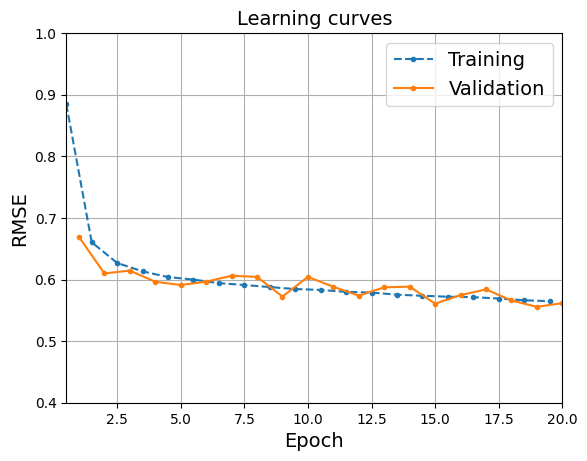

In [ ]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

Agora que conseguimos calcular métricas corretamente, podemos atualizar a função `train()` para:

- Avaliar o desempenho do modelo **durante o treinamento** no conjunto de treino a cada época;
- Avaliar o desempenho no **conjunto de validação** ao final de cada época.

### Observações importantes:

- Se a performance no conjunto de treino for muito melhor que no conjunto de validação, isso pode indicar:
  - **Overfitting**;
  - Algum **erro nos dados**, como desajuste entre o conjunto de treino e validação.
- É recomendável **plotar as curvas de aprendizado** para analisar essas diferenças, usando:
  - **Matplotlib**;
  - Ou ferramentas de visualização como **TensorBoard**.

---

## Próximos Passos

Até agora, aprendemos a:

- Construir, treinar e avaliar um **MLP de regressão** com PyTorch;
- Utilizar o modelo treinado para fazer previsões.

No entanto, tratamos apenas de **modelos sequenciais simples**, formados por camadas lineares e funções de ativação ReLU.  

Para construir **modelos mais complexos e não sequenciais**, será necessário criar **módulos personalizados**.









# 6. Building Nonsequential Models Using Custom Modules

Alguns modelos de redes neurais precisam receber **várias entradas** que não podem ser facilmente combinadas em um único tensor. Isso ocorre, por exemplo, quando as entradas possuem **diferentes números de dimensões**, como no caso de se alimentar a rede neural com **imagens e textos** ao mesmo tempo.  

Para lidar com essas situações, precisamos **adaptar o método `forward()`** do modelo para aceitar e processar múltiplas entradas separadamente.  

No caso do modelo **Wide & Deep**, que combina diferentes tipos de dados (wide features e deep features), essa adaptação permite que cada entrada seja processada adequadamente antes de serem combinadas na rede.








<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![wide_deep](Aula_Imagens\wide_deep.png)

</div>

In [ ]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + n_features, 1)

    def forward(self, X):
        deep_output = self.deep_stack(X)
        wide_and_deep = torch.concat([X, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

No PyTorch, podemos incorporar **qualquer tipo de módulo** dentro de um módulo personalizado. No caso do modelo **Wide & Deep**:

- A parte "deep" é construída com **`nn.Sequential`**, implementando uma MLP (mesma arquitetura usada anteriormente, mas em um exemplo simplificado).
- A **camada de saída** foi separada, pois precisa receber a **concatenação da entrada do modelo com a saída da parte deep**.
- Consequentemente, a camada de saída agora possui **`40 + n_features`** entradas, ao invés de apenas 40.

No método `forward()`:

1. Passamos a entrada `X` para a **stack deep**.
2. Concatenamos **`X` com a saída da stack deep**.
3. Alimentamos a **camada de saída** com essa concatenação.

Após a definição do modelo, podemos:

- **Criar uma instância** do módulo personalizado.
- **Mover para GPU** para acelerar o treinamento.
- **Treinar, avaliar e usar** o modelo da mesma forma que os modelos anteriores.

Essa abordagem permite lidar com **entradas múltiplas** e combinações de módulos de forma flexível, mantendo a simplicidade no pipeline de treinamento e inferência.








In [ ]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002  # the model changed, so did the optimal learning rate

In [ ]:
# extra code: train the model, exactly our previous models
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.7802, train metric: 1.3344, valid metric: 0.8690
Epoch 2/20, train loss: 0.6201, train metric: 0.7875, valid metric: 0.9492
Epoch 3/20, train loss: 0.5900, train metric: 0.7682, valid metric: 0.7331
Epoch 4/20, train loss: 0.5607, train metric: 0.7488, valid metric: 0.7771
Epoch 5/20, train loss: 0.5408, train metric: 0.7353, valid metric: 0.7967
Epoch 6/20, train loss: 0.5244, train metric: 0.7241, valid metric: 0.7098
Epoch 7/20, train loss: 0.5070, train metric: 0.7119, valid metric: 0.7419
Epoch 8/20, train loss: 0.4941, train metric: 0.7030, valid metric: 0.6750
Epoch 9/20, train loss: 0.4798, train metric: 0.6928, valid metric: 0.6762
Epoch 10/20, train loss: 0.4657, train metric: 0.6825, valid metric: 0.6678
Epoch 11/20, train loss: 0.4538, train metric: 0.6736, valid metric: 0.6617
Epoch 12/20, train loss: 0.4441, train metric: 0.6665, valid metric: 0.6651
Epoch 13/20, train loss: 0.4328, train metric: 0.6580, valid metric: 0.6803
Epoch 14/20, train lo

Em alguns casos, pode ser necessário enviar **subconjuntos diferentes de features** por caminhos distintos do modelo, como:

- Algumas features passam pelo **caminho wide**.
- Outras features (possivelmente sobrepostas) passam pelo **caminho deep**.

Para isso, uma abordagem comum é **dividir as entradas dentro do método `forward()`**.  

Isso permite controlar exatamente quais features alimentam cada parte da rede, garantindo maior flexibilidade no processamento dos dados.








In [ ]:
class WideAndDeepV2(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X):
        X_wide = X[:, :5]
        X_deep = X[:, 2:]
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

Embora seja possível dividir os inputs dentro do método `forward()`, muitas vezes é **mais conveniente que o modelo aceite dois tensores separados** como entrada.  

Vantagens dessa abordagem:

- **Mais claro e organizado**: cada tensor representa explicitamente um subconjunto de features.
- **Evita confusões** ao separar manualmente os dados dentro do forward.
- **Facilita a reutilização** do modelo em diferentes contextos, como combinar imagens e textos ou diferentes tipos de dados estruturados.








In [ ]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)

In [ ]:
# extra code: train the model, exactly our previous models
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.8482, train metric: 1.3598, valid metric: 0.9100
Epoch 2/20, train loss: 0.6282, train metric: 0.7927, valid metric: 0.8028
Epoch 3/20, train loss: 0.5763, train metric: 0.7591, valid metric: 0.7567
Epoch 4/20, train loss: 0.5413, train metric: 0.7356, valid metric: 0.7290
Epoch 5/20, train loss: 0.5099, train metric: 0.7142, valid metric: 0.7011
Epoch 6/20, train loss: 0.4841, train metric: 0.6958, valid metric: 0.6816
Epoch 7/20, train loss: 0.4656, train metric: 0.6824, valid metric: 0.6670
Epoch 8/20, train loss: 0.4526, train metric: 0.6728, valid metric: 0.6576
Epoch 9/20, train loss: 0.4438, train metric: 0.6662, valid metric: 0.6539
Epoch 10/20, train loss: 0.4380, train metric: 0.6618, valid metric: 0.6498
Epoch 11/20, train loss: 0.4326, train metric: 0.6577, valid metric: 0.6470
Epoch 12/20, train loss: 0.4284, train metric: 0.6546, valid metric: 0.6447
Epoch 13/20, train loss: 0.4253, train metric: 0.6521, valid metric: 0.6452
Epoch 14/20, train lo

## 6.1 Building Models with Multiple Inputs

Alguns modelos de redes neurais precisam receber **mais de uma entrada** que não podem ser facilmente combinadas em um único tensor. Isso acontece, por exemplo, quando as entradas possuem **diferentes números de dimensões**, como ao alimentar a rede com **imagens e textos simultaneamente**.

Para que o modelo **Wide & Deep** aceite **duas entradas separadas** (como ilustrado na Figura 10-2 do livro), é necessário **adaptar o método `forward()`** do modelo para processar cada entrada individualmente.

In [ ]:
class WideAndDeepV3(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![concat](Aula_Imagens\concat.png)

</div>

Para trabalhar com múltiplas entradas no modelo Wide & Deep, precisamos criar **datasets que retornem separadamente as entradas para o caminho wide e para o caminho deep**.

Isso garante que cada subconjunto de features seja fornecido ao caminho correto da rede, mantendo a consistência e a clareza do fluxo de dados durante o treinamento e a avaliação.








In [ ]:
torch.manual_seed(42)
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32)

In [ ]:
def evaluate_multi_in(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch_wide, X_batch_deep, y_batch in data_loader:
            X_batch_wide = X_batch_wide.to(device)
            X_batch_deep = X_batch_deep.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch_wide, X_batch_deep)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

def train_multi_in(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for *X_batch_inputs, y_batch in train_loader:
            model.train()
            X_batch_inputs = [X.to(device) for X in X_batch_inputs]
            y_batch = y_batch.to(device)
            y_pred = model(*X_batch_inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_in(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_in(model, optimizer, mse, rmse, train_loader_wd,
                         valid_loader_wd, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5888
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5981
Epoch 14/20, train lo

Quando o modelo possui **múltiplas entradas**, é fácil confundir a ordem dos tensores, o que pode gerar **erros difíceis de depurar**.

Para evitar isso, uma boa prática é **nomear cada entrada**.  

Uma abordagem é criar um **dataset personalizado** que retorne um **dicionário**, onde as chaves são os nomes das entradas e os valores são os tensores correspondentes.  

Isso torna o código mais legível e reduz a chance de erros ao alimentar o modelo.








In [ ]:
class WideAndDeepDataset(torch.utils.data.Dataset):
    def __init__(self, X_wide, X_deep, y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
        return input_dict, self.y[idx]

Após definir como as entradas serão retornadas (separadas ou nomeadas), o próximo passo é **criar os datasets e os data loaders**.

- **Datasets**: fornecem os dados ao modelo de forma estruturada, retornando os tensores correspondentes a cada entrada.
- **Data Loaders**: permitem iterar sobre os datasets em **mini-batches**, embaralhar os dados e facilitar o treinamento eficiente no PyTorch.

Essa etapa garante que o modelo receba os dados corretamente e de forma eficiente durante o treinamento e avaliação.








In [ ]:
torch.manual_seed(42)
train_data_named = WideAndDeepDataset(
    X_wide=X_train[:, :5], X_deep=X_train[:, 2:], y=y_train)
train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_data_named = WideAndDeepDataset(
    X_wide=X_valid[:, :5], X_deep=X_valid[:, 2:], y=y_valid)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_data_named = WideAndDeepDataset(
    X_wide=X_test[:, :5], X_deep=X_test[:, 2:], y=y_test)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [ ]:
def evaluate_named(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(X_wide=inputs["X_wide"], X_deep=inputs["X_deep"])
            metric.update(y_pred, y_batch)
    return metric.compute()  # compute the final result at the end

def train_named(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_named(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_named(model, optimizer, mse, rmse, train_loader_named,
                      valid_loader_named, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5888
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5981
Epoch 14/20, train lo

## 6.2 Building Models with Multiple Outputs


Existem diversos cenários em que **uma rede neural precisa ter múltiplas saídas**:

### 1. Tarefas que exigem múltiplos tipos de previsão
- Por exemplo, localizar e classificar o objeto principal em uma imagem.
- Isso combina **regressão** (localização) e **classificação** (tipo do objeto) na mesma rede.

### 2. Multitask Learning (Aprendizado Multitarefa)
- Quando temos **múltimas tarefas independentes** com base nos mesmos dados.
- Treinar uma rede por tarefa é possível, mas **treinar uma única rede com uma saída por tarefa** geralmente gera melhores resultados.
- A rede aprende **features compartilhadas úteis** para todas as tarefas.
- Exemplo: classificar expressões faciais (sorriso, surpresa) e identificar se a pessoa usa óculos simultaneamente.

### 3. Regularização com Saídas Auxiliares
- Adicionar uma saída auxiliar ajuda a **reduzir overfitting** e melhorar a generalização.
- A saída auxiliar força a **parte subjacente da rede** a aprender algo útil por si só.
- Exemplo no modelo **Wide & Deep**:
  - A saída da stack deep tem dimensão 40.
  - O alvo tem dimensão 1.
  - Adicionamos uma camada **`nn.Linear`** para mapear de 40 → 1 para a saída auxiliar.
  - O método `forward()` deve calcular **tanto a saída principal quanto a saída auxiliar**.

<div align="center" style="margin-top:20px; margin-bottom:20px;">
  
![concat](Aula_Imagens\aux_out.png)

</div>

In [ ]:
class WideAndDeepV4(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)
        self.aux_output_layer = nn.Linear(30, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        main_output = self.output_layer(wide_and_deep)
        aux_output = self.aux_output_layer(deep_output)
        return main_output, aux_output

In [ ]:
import torchmetrics

def evaluate_multi_out(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, _ = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_out(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, y_pred_aux = model(**inputs)
            main_loss = criterion(y_pred, y_batch)
            aux_loss = criterion(y_pred_aux, y_batch)
            loss = 0.8 * main_loss + 0.2 * aux_loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_out(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV4(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_out(model, optimizer, mse, rmse, train_loader_named,
                          valid_loader_named, n_epochs)

Epoch 1/20, train loss: 1.0693, train metric: 0.9506, valid metric: 0.7085
Epoch 2/20, train loss: 0.5817, train metric: 0.6946, valid metric: 0.6607
Epoch 3/20, train loss: 0.5010, train metric: 0.6581, valid metric: 0.6425
Epoch 4/20, train loss: 0.4690, train metric: 0.6497, valid metric: 0.6654
Epoch 5/20, train loss: 0.4503, train metric: 0.6420, valid metric: 0.6338
Epoch 6/20, train loss: 0.4387, train metric: 0.6373, valid metric: 0.6563
Epoch 7/20, train loss: 0.4315, train metric: 0.6330, valid metric: 0.6193
Epoch 8/20, train loss: 0.4249, train metric: 0.6302, valid metric: 0.6167
Epoch 9/20, train loss: 0.4116, train metric: 0.6202, valid metric: 0.6450
Epoch 10/20, train loss: 0.4085, train metric: 0.6198, valid metric: 0.5938
Epoch 11/20, train loss: 0.4073, train metric: 0.6197, valid metric: 0.5959
Epoch 12/20, train loss: 0.3914, train metric: 0.6078, valid metric: 0.6073
Epoch 13/20, train loss: 0.3847, train metric: 0.6033, valid metric: 0.5815
Epoch 14/20, train lo

# 7. Building an Image Classifier with PyTorch

Neste capítulo, continuaremos trabalhando com o **dataset Fashion MNIST**. A primeira etapa é fazer o download dos dados.

## 7.1 Using TorchVision to Load the Dataset

A **TorchVision** é uma biblioteca essencial no ecossistema PyTorch para **visão computacional**. Ela oferece:

- Funções utilitárias para **baixar datasets comuns**, como MNIST e Fashion MNIST.  
- **Modelos pré-treinados** para diversas tarefas de visão computacional (ver Capítulo 12).  
- Funções para **transformar imagens**, incluindo corte, rotação, redimensionamento, entre outras.  

> Observação: No Google Colab, a TorchVision já vem pré-instalada.

No caso do Fashion MNIST:

- O dataset já vem dividido em:
  - **Treinamento:** 60.000 imagens  
  - **Teste:** 10.000 imagens  
- Para validação, podemos reservar **5.000 imagens** do conjunto de treinamento usando a função `random_split()` do PyTorch.








In [ ]:
import torchvision
import torchvision.transforms.v2 as T

toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=toTensor)

torch.manual_seed(42)
train_data, valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000])

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 178kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.26MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.1MB/s]


In [ ]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

Each entry is a tuple (image, target):

In [ ]:
X_sample, y_sample = train_data[0]

Each image has a shape \[channels, rows, columns\]. Grayscale images like in Fashion MNIST have a single channel (while RGB images have 3, and other types of images, such as satellite images, may have many more). Fashion images are grayscale and 28x28 pixels:

In [ ]:
X_sample.shape

torch.Size([1, 28, 28])

In [ ]:
X_sample.dtype

torch.float32

In [ ]:
train_and_valid_data.classes[y_sample]

'Ankle boot'

![NCIA2](NCIA_Images\end.png)